# 神經網路NN實作

今天我們要透過[numpy](https://numpy.org/)套件，來建立課程投影片中有提到的多層感知器，讓大家更認識深度學習中層與層間的關係，以及對接下來的梯度下降有概念。

In [9]:
# !pip install numpy

In [10]:
import numpy as np

我們先將激勵函數（Activation function）定義好，方便後續使用。

這裡請大家建立好 relu 與 Softmax 函數。

In [11]:
def linear(x):
  return x

def relu(x):
    return np.maximum(0, x)


def softmax(x):
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=0)

## 1. 輸入層（Input layer）

In [12]:
x_input = np.array([7, 2])
x_input

array([7, 2])

## 2. 隱藏層（Hidden layer）權重（Weight）、偏移（Bias）

In [13]:
W0 = np.array([
    [0.1,0.7,-0.1],
    [0.2,-0.4,-0.2]
])

B0 = np.array([-1.5,0.2,0.8])


In [14]:
H1 = np.dot(W0.T, x_input)+B0
H1

array([-0.4,  4.3, -0.3])

In [15]:
H1_actv = relu(H1)
H1_actv

array([0. , 4.3, 0. ])

## 3. 輸出層（Output layer）

In [16]:
W1 = np.array([[0.2], [0.3], [0.4]])

B1 = np.array([0.1])

In [17]:
H2 = np.dot(W1.T, H1_actv)+B1
H2

array([1.39])

In [18]:
H2_actv = softmax(H2)
H2_actv

array([1.])

## 4. 接著自己實作輸入維度相同，但有2層隱藏層，以及輸出為3維的網路架構。

輸入數值、權重、bias 請自行決定，請此神經網路之架構
由於輸出的特性，須改用Softmax函數作為輸出層的激勵函數。

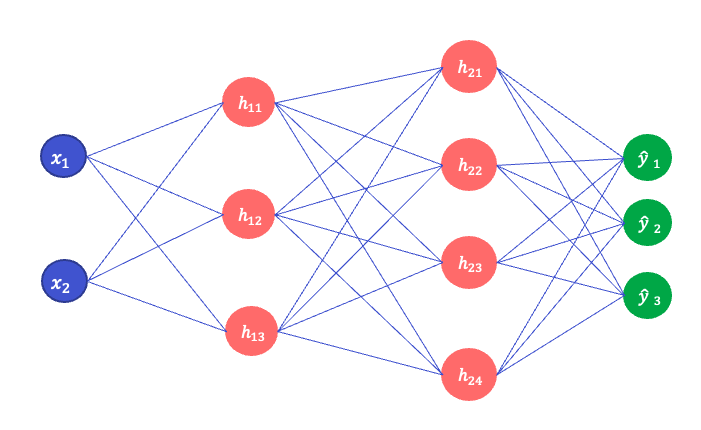

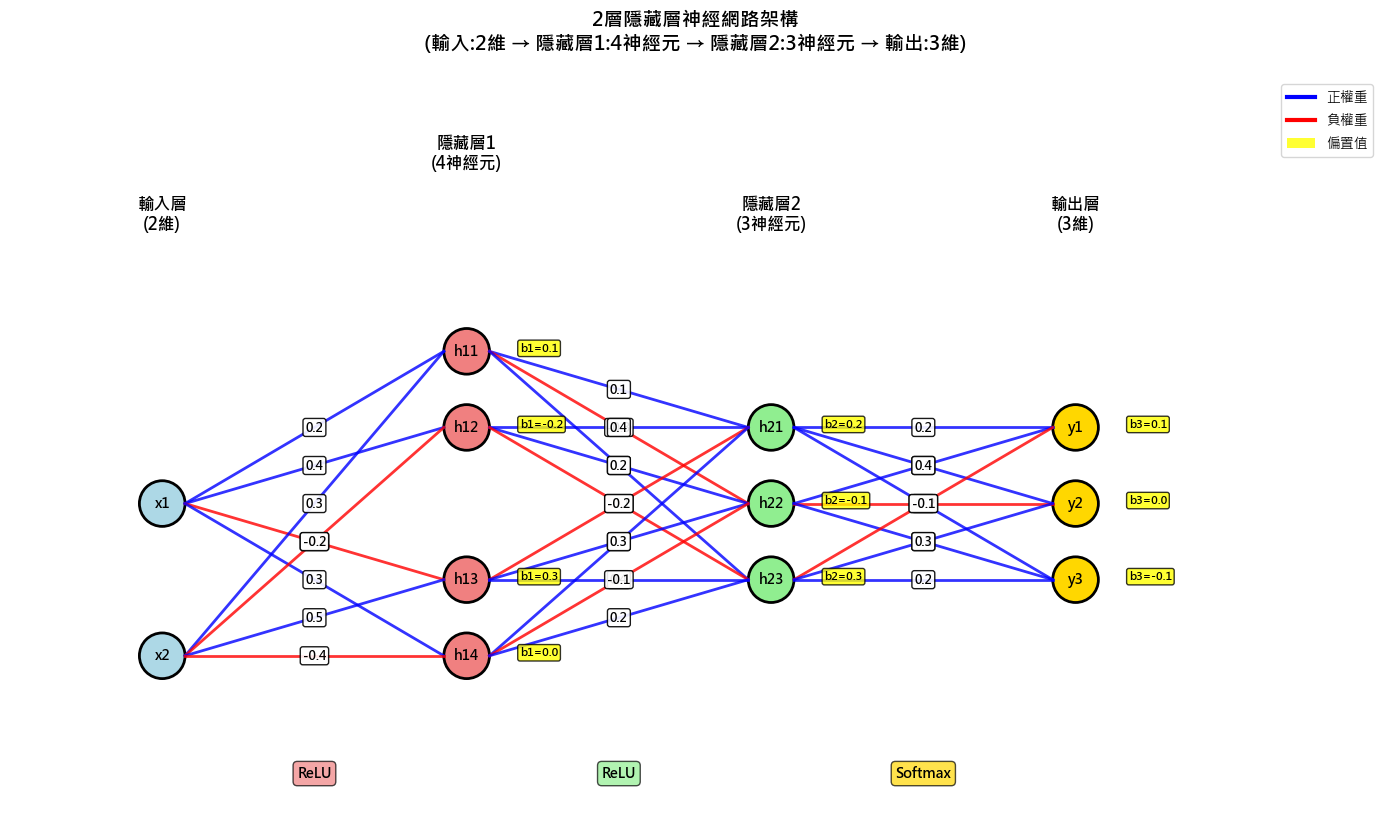

神經網路架構詳細資訊
輸入值: x1 = 5, x2 = 3

權重矩陣:
W1 (輸入層→隱藏層1):
[[ 0.2  0.4 -0.1  0.3]
 [ 0.3 -0.2  0.5 -0.4]]

W2 (隱藏層1→隱藏層2):
[[ 0.1 -0.3  0.2]
 [ 0.4  0.2 -0.1]
 [-0.2  0.3  0.4]
 [ 0.3 -0.1  0.2]]

W3 (隱藏層2→輸出層):
[[ 0.2  0.1  0.3]
 [ 0.4 -0.2  0.1]
 [-0.1  0.3  0.2]]

偏置值:
第一層隱藏層偏置: [0.1, -0.2, 0.3, 0.0]
第二層隱藏層偏置: [0.2, -0.1, 0.3]
輸出層偏置: [0.1, 0.0, -0.1]


In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 建立圖形
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# 設定節點位置
input_pos = [(1, 2), (1, 1)]
hidden1_pos = [(3, 3), (3, 2.5), (3, 1.5), (3, 1)]
hidden2_pos = [(5, 2.5), (5, 2), (5, 1.5)]
output_pos = [(7, 2.5), (7, 2), (7, 1.5)]

# 繪製節點
def draw_node(pos, label, color):
    circle = patches.Circle(pos, 0.15, facecolor=color, edgecolor='black', linewidth=2)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], label, ha='center', va='center', fontsize=10, fontweight='bold')

# 繪製輸入層節點
for i, pos in enumerate(input_pos):
    draw_node(pos, f'x{i+1}', 'lightblue')

# 繪製第一層隱藏層節點
for i, pos in enumerate(hidden1_pos):
    draw_node(pos, f'h1{i+1}', 'lightcoral')  # 移除特殊字符

# 繪製第二層隱藏層節點
for i, pos in enumerate(hidden2_pos):
    draw_node(pos, f'h2{i+1}', 'lightgreen')  # 移除特殊字符

# 繪製輸出層節點
for i, pos in enumerate(output_pos):
    draw_node(pos, f'y{i+1}', 'gold')  # 移除特殊字符

# 繪製連接線和權重
def draw_connection(pos1, pos2, weight, color='gray'):
    ax.plot([pos1[0]+0.15, pos2[0]-0.15], [pos1[1], pos2[1]], 
            color=color, linewidth=2, alpha=0.8)
    # 在連接線中點標註權重
    mid_x = (pos1[0] + pos2[0]) / 2
    mid_y = (pos1[1] + pos2[1]) / 2
    # 使用更簡單的文字框樣式
    ax.text(mid_x, mid_y, f'{weight:.1f}', fontsize=9, 
            bbox=dict(boxstyle="round,pad=0.2", facecolor='white', edgecolor='black', alpha=0.9),
            ha='center', va='center', fontweight='bold')

# 定義權重矩陣
W1_layer1 = np.array([
    [0.2, 0.4, -0.1, 0.3],
    [0.3, -0.2, 0.5, -0.4]
])

W2_layer2 = np.array([
    [0.1, -0.3, 0.2],
    [0.4, 0.2, -0.1],
    [-0.2, 0.3, 0.4],
    [0.3, -0.1, 0.2]
])

W3_output = np.array([
    [0.2, 0.1, 0.3],
    [0.4, -0.2, 0.1],
    [-0.1, 0.3, 0.2]
])

# 繪製輸入層到第一層隱藏層的連接
for i, input_p in enumerate(input_pos):
    for j, hidden_p in enumerate(hidden1_pos):
        weight = W1_layer1[i, j]
        color = 'blue' if weight > 0 else 'red'
        draw_connection(input_p, hidden_p, weight, color)

# 繪製第一層隱藏層到第二層隱藏層的連接
for i, hidden1_p in enumerate(hidden1_pos):
    for j, hidden2_p in enumerate(hidden2_pos):
        weight = W2_layer2[i, j]
        color = 'blue' if weight > 0 else 'red'
        draw_connection(hidden1_p, hidden2_p, weight, color)

# 繪製第二層隱藏層到輸出層的連接
for i, hidden2_p in enumerate(hidden2_pos):
    for j, output_p in enumerate(output_pos):
        weight = W3_output[i, j]
        color = 'blue' if weight > 0 else 'red'
        draw_connection(hidden2_p, output_p, weight, color)

# 添加偏置值標註
bias1 = [0.1, -0.2, 0.3, 0.0]
bias2 = [0.2, -0.1, 0.3]
bias3 = [0.1, 0.0, -0.1]

# 標註第一層隱藏層偏置
for i, (pos, bias) in enumerate(zip(hidden1_pos, bias1)):
    ax.text(pos[0]+0.35, pos[1], f'b1={bias:.1f}', fontsize=8, 
            bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.8),
            fontweight='bold')

# 標註第二層隱藏層偏置
for i, (pos, bias) in enumerate(zip(hidden2_pos, bias2)):
    ax.text(pos[0]+0.35, pos[1], f'b2={bias:.1f}', fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.8),
            fontweight='bold')

# 標註輸出層偏置
for i, (pos, bias) in enumerate(zip(output_pos, bias3)):
    ax.text(pos[0]+0.35, pos[1], f'b3={bias:.1f}', fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.8),
            fontweight='bold')

# 添加層標籤
ax.text(1, 3.8, '輸入層\n(2維)', ha='center', fontsize=12, fontweight='bold')
ax.text(3, 4.2, '隱藏層1\n(4神經元)', ha='center', fontsize=12, fontweight='bold')
ax.text(5, 3.8, '隱藏層2\n(3神經元)', ha='center', fontsize=12, fontweight='bold')
ax.text(7, 3.8, '輸出層\n(3維)', ha='center', fontsize=12, fontweight='bold')

# 添加激活函數標註
ax.text(2, 0.2, 'ReLU', ha='center', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))
ax.text(4, 0.2, 'ReLU', ha='center', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))
ax.text(6, 0.2, 'Softmax', ha='center', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='gold', alpha=0.7))

# 添加圖例
legend_elements = [
    plt.Line2D([0], [0], color='blue', lw=3, label='正權重'),
    plt.Line2D([0], [0], color='red', lw=3, label='負權重'),
    patches.Patch(facecolor='yellow', alpha=0.8, label='偏置值')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# 設定軸的範圍和隱藏軸
ax.set_xlim(0, 9)
ax.set_ylim(0, 4.8)
ax.set_aspect('equal')
ax.axis('off')

# 設定標題
plt.title('2層隱藏層神經網路架構\n(輸入:2維 → 隱藏層1:4神經元 → 隱藏層2:3神經元 → 輸出:3維)', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 顯示網路詳細資訊
print("="*50)
print("神經網路架構詳細資訊")
print("="*50)
print(f"輸入值: x1 = 5, x2 = 3")
print("\n權重矩陣:")
print("W1 (輸入層→隱藏層1):")
print(W1_layer1)
print("\nW2 (隱藏層1→隱藏層2):")
print(W2_layer2)
print("\nW3 (隱藏層2→輸出層):")
print(W3_output)
print("\n偏置值:")
print(f"第一層隱藏層偏置: {bias1}")
print(f"第二層隱藏層偏置: {bias2}")
print(f"輸出層偏置: {bias3}")

In [21]:
# 4. 接著自己實作輸入維度相同，但有2層隱藏層，以及輸出為3維的網路架構

## 輸入層 (2維，與原來相同)
x_input_2 = np.array([5, 3])  # 自訂輸入值
print("輸入層:", x_input_2)

## 第一層隱藏層 (假設4個神經元)
W1_layer1 = np.array([
    [0.2, 0.4, -0.1, 0.3],
    [0.3, -0.2, 0.5, -0.4]
])

B1_layer1 = np.array([0.1, -0.2, 0.3, 0.0])

# 第一層隱藏層計算
H1_layer1 = np.dot(W1_layer1.T, x_input_2) + B1_layer1
print("第一層隱藏層輸出 (未激活):", H1_layer1)

# 第一層隱藏層激活
H1_layer1_actv = relu(H1_layer1)
print("第一層隱藏層輸出 (ReLU激活):", H1_layer1_actv)

## 第二層隱藏層 (假設3個神經元)
W2_layer2 = np.array([
    [0.1, -0.3, 0.2],
    [0.4, 0.2, -0.1],
    [-0.2, 0.3, 0.4],
    [0.3, -0.1, 0.2]
])

B2_layer2 = np.array([0.2, -0.1, 0.3])

# 第二層隱藏層計算
H2_layer2 = np.dot(W2_layer2.T, H1_layer1_actv) + B2_layer2
print("第二層隱藏層輸出 (未激活):", H2_layer2)

# 第二層隱藏層激活
H2_layer2_actv = relu(H2_layer2)
print("第二層隱藏層輸出 (ReLU激活):", H2_layer2_actv)

## 輸出層 (3維輸出)
W3_output = np.array([
    [0.2, 0.1, 0.3],
    [0.4, -0.2, 0.1],
    [-0.1, 0.3, 0.2]
])

B3_output = np.array([0.1, 0.0, -0.1])

# 輸出層計算
output = np.dot(W3_output.T, H2_layer2_actv) + B3_output
print("輸出層 (未激活):", output)

# 輸出層使用 Softmax 激活
output_softmax = softmax(output)
print("最終輸出 (Softmax激活):", output_softmax)
print("輸出總和:", np.sum(output_softmax))  # 驗證 Softmax 輸出總和為1

print("\n=== 網路架構總結 ===")
print(f"輸入層: {x_input_2.shape[0]} 維")
print(f"第一層隱藏層: {H1_layer1_actv.shape[0]} 神經元 (ReLU)")
print(f"第二層隱藏層: {H2_layer2_actv.shape[0]} 神經元 (ReLU)")
print(f"輸出層: {output_softmax.shape[0]} 維 (Softmax)")

輸入層: [5 3]
第一層隱藏層輸出 (未激活): [2.  1.2 1.3 0.3]
第一層隱藏層輸出 (ReLU激活): [2.  1.2 1.3 0.3]
第二層隱藏層輸出 (未激活): [ 0.71 -0.1   1.16]
第二層隱藏層輸出 (ReLU激活): [0.71 0.   1.16]
輸出層 (未激活): [0.126 0.419 0.345]
最終輸出 (Softmax激活): [0.27891871 0.37387457 0.34720673]
輸出總和: 1.0

=== 網路架構總結 ===
輸入層: 2 維
第一層隱藏層: 4 神經元 (ReLU)
第二層隱藏層: 3 神經元 (ReLU)
輸出層: 3 維 (Softmax)
